In [1]:

import torch
from torch import nn
import seaborn as sns
import pandas as pd
import matplotlib.pyplot  as plt

Öncelikle datamızı pandas kütüphanesi ile okuyalım.

In [2]:
dataset = pd.read_csv("/kaggle/input/salary-data-simple-linear-regression/Salary_Data.csv")
dataset


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


yukarda ki data ile modeli eğiteceğimden şimdiden datayı karıştırıyorum. Böylece model daha iyi öğrenmiş olacak

In [3]:
dataset = dataset.sample(frac=1).reset_index(drop=True)

print(dataset)

    YearsExperience    Salary
0               8.2  113812.0
1               7.9  101302.0
2               1.3   46205.0
3               5.9   81363.0
4               6.8   91738.0
5               8.7  109431.0
6               2.9   56642.0
7               2.0   43525.0
8               9.5  116969.0
9               9.0  105582.0
10              3.0   60150.0
11              4.0   56957.0
12              5.1   66029.0
13              1.5   37731.0
14              1.1   39343.0
15              4.0   55794.0
16             10.3  122391.0
17              7.1   98273.0
18              3.2   54445.0
19              9.6  112635.0
20              3.7   57189.0
21              6.0   93940.0
22              3.9   63218.0
23             10.5  121872.0
24              4.5   61111.0
25              3.2   64445.0
26              4.1   57081.0
27              2.2   39891.0
28              5.3   83088.0
29              4.9   67938.0


Ek olarak datamızın nasıl dağıldığını görmek için görselleştirelim.

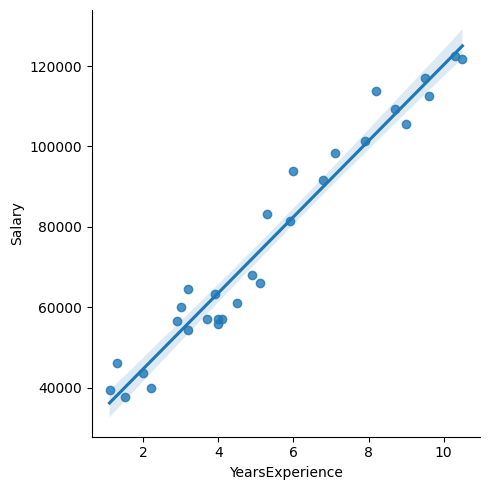

In [4]:
print(sns.lmplot(y="Salary", x="YearsExperience",data=dataset))


Şimdi de elimizde ki datanın bir kısmı ile modeli eğitip diğer kısmı ile modeli test etmek için datamızı %80 train ve %20 test verisi olmak üzere ayıralım.

In [5]:
num= len(dataset["Salary"])
num80= int(num*0.8)
Salary_train= dataset["Salary"][0:num80]
Salary_test= dataset["Salary"][num80:]
year_train= dataset["YearsExperience"][0:num80]
year_test= dataset["YearsExperience"][num80:]
print(Salary_train)
print("-------------------------------------")
print(Salary_test)

0     113812.0
1     101302.0
2      46205.0
3      81363.0
4      91738.0
5     109431.0
6      56642.0
7      43525.0
8     116969.0
9     105582.0
10     60150.0
11     56957.0
12     66029.0
13     37731.0
14     39343.0
15     55794.0
16    122391.0
17     98273.0
18     54445.0
19    112635.0
20     57189.0
21     93940.0
22     63218.0
23    121872.0
Name: Salary, dtype: float64
-------------------------------------
24    61111.0
25    64445.0
26    57081.0
27    39891.0
28    83088.0
29    67938.0
Name: Salary, dtype: float64


yukarda ki veriyi(pandas arrayi) önce numpy'a burdan da tensore atayalım. çünkü model oluştururken sinir ağları tensörler ile çalışır. Bundan dolayı verilerimizin tensör içinde olması gerekir.

In [6]:
Salary_train_tensor= torch.Tensor(Salary_train.to_numpy()).unsqueeze(1)
Salary_test_tensor= torch.Tensor(Salary_test.to_numpy()).unsqueeze(1)
year_train_tensor= torch.Tensor(year_train.to_numpy()).unsqueeze(1)
year_test_tensor= torch.Tensor(year_test.to_numpy()).unsqueeze(1)

year_test_tensor

tensor([[4.5000],
        [3.2000],
        [4.1000],
        [2.2000],
        [5.3000],
        [4.9000]])

Eğitilmemiş modeli oluşturalım önce.

In [7]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer_1=nn.Linear(in_features=1,
                      out_features=5)
    self.linear_layer_2=nn.Linear(in_features=5,
                                out_features=1)

  def forward(self, x: torch.Tensor):
    return self.linear_layer_2(self.linear_layer_1(x))

Bir model örneği oluşturalım.

In [8]:
torch.manual_seed(4)
model= LinearRegressionModel()

model için loss ve optimizer lazım bunları belirtelim ve de learning rate(lr) oranımızı da belirtelim.

In [9]:

loss_fn= nn.L1Loss()
optimizer= torch.optim.SGD(model.parameters(), lr=0.01)

Belirlediğimiz epoch boyunca modelimizi train datamız üzerinde eğitelim ve çıktı olarak train, test kayıplarımıza bakalım. Böylece model kayıbı azalıp azalmadığını görelim.

In [10]:
train_losses= []
test_losses=[]

epochs= 1500

for epoch in range(epochs):
  #model train
  model.train()
  train_pred= model(year_train_tensor)
  train_loss= loss_fn(train_pred, Salary_train_tensor)
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  #model test
  model.eval()
  with torch.inference_mode():
    test_pred= model(year_test_tensor)
    test_loss= loss_fn(test_pred, Salary_test_tensor)

    train_losses.append(train_loss.detach().item())
    test_losses.append(test_loss.detach().item())


    if epoch%100==0:
      print(f"{epoch}--epoch   train loss:{int(train_loss)}----test loss:{int(test_loss)}")

0--epoch   train loss:79440----test loss:62259
100--epoch   train loss:10495----test loss:9511
200--epoch   train loss:8722----test loss:6652
300--epoch   train loss:6832----test loss:5674
400--epoch   train loss:5096----test loss:5560
500--epoch   train loss:5920----test loss:6168
600--epoch   train loss:5364----test loss:6098
700--epoch   train loss:5614----test loss:6289
800--epoch   train loss:5568----test loss:6303
900--epoch   train loss:5339----test loss:6253
1000--epoch   train loss:5412----test loss:6310
1100--epoch   train loss:4972----test loss:6154
1200--epoch   train loss:5144----test loss:6236
1300--epoch   train loss:5015----test loss:6199
1400--epoch   train loss:4848----test loss:6143


modele baktığımız zaman kayıplar azalmakta. Bu kayıpları daha iyi görmek için şimdide görselleştirelim.

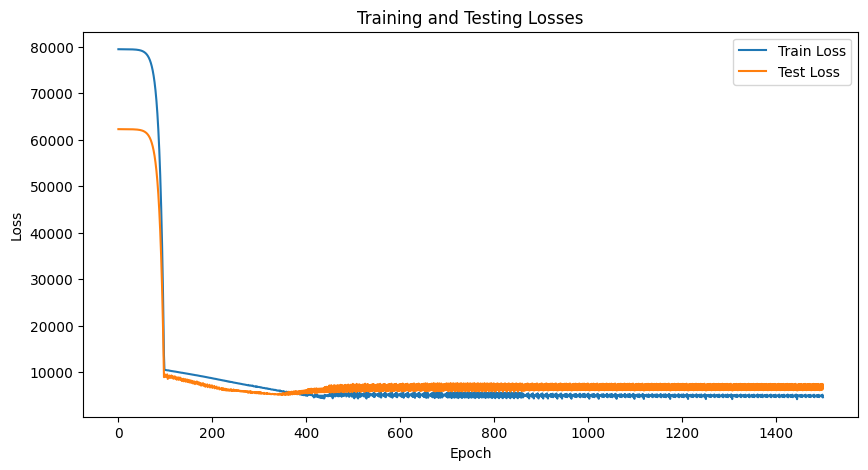

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Losses')
plt.legend()
plt.show()

Modelimizi pathlib kütüphanesini kullanarak kaydedelim.

In [12]:
import pathlib
from pathlib import Path
model_dir = pathlib.Path("models")
model_dir.mkdir(parents=True, exist_ok=True)
model_path = model_dir / "linear_regression_model.pth"

# Modeli kaydetme
torch.save(model.state_dict(), model_path)
print(f"Model saved to {model_path}")

Model saved to models/linear_regression_model.pth


şimdi de kaydettiğimiz modelin öğrenmiş olduğu parametreleri yeni bir öodel örneğine atayıp bu yeni model örneği ile tahminler yapalım.

In [13]:
model_0= LinearRegressionModel()
model_0.load_state_dict(torch.load("models/linear_regression_model.pth"))
print("------------------predictions-------------------------")
print(model_0(year_test_tensor))
print("--------------Salary_test_tensor----------------------")
Salary_test_tensor

------------------predictions-------------------------
tensor([[70184.6094],
        [57417.3711],
        [66256.2344],
        [47596.4297],
        [78041.3750],
        [74112.9922]], grad_fn=<AddmmBackward0>)
--------------Salary_test_tensor----------------------


tensor([[61111.],
        [64445.],
        [57081.],
        [39891.],
        [83088.],
        [67938.]])

Şimdi test verisi üzerinde yaptığımız tahminlere baktığımız zaman gerçek test verilerimize çok yakın değerler ama aynısı değil.
Çünkü burda model binary bir sınıflandırma yapmıyor bu yüzden doğrudan 
gerçek veriye eşit olmak yerine ona yakın değerler üretiyor.